<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/practicasregresionlasso_ridge_Mateo_Gonzalez_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  




In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta = '/content/drive/MyDrive/Colab_Notebooks/insurance.csv'
df = pd.read_csv(ruta)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    




--- Análisis de AGE ---
Medidas de tendencia central:
  Media: 39.21
  Mediana: 39.00
  Moda: 18.00

Medidas de dispersión:
  Desviación estándar: 14.05
  Varianza: 197.40
  Rango: 46.00
  IQR: 24.00
  Coeficiente de variación: 35.84%

Valores extremos (outliers):
  Número de outliers: 0
  Porcentaje de outliers: 0.00%

--- Análisis de BMI ---
Medidas de tendencia central:
  Media: 30.66
  Mediana: 30.40
  Moda: 32.30

Medidas de dispersión:
  Desviación estándar: 6.10
  Varianza: 37.19
  Rango: 37.17
  IQR: 8.40
  Coeficiente de variación: 19.89%

Valores extremos (outliers):
  Número de outliers: 9
  Porcentaje de outliers: 0.67%

--- Análisis de CHILDREN ---
Medidas de tendencia central:
  Media: 1.09
  Mediana: 1.00
  Moda: 0.00

Medidas de dispersión:
  Desviación estándar: 1.21
  Varianza: 1.45
  Rango: 5.00
  IQR: 2.00
  Coeficiente de variación: 110.10%

Valores extremos (outliers):
  Número de outliers: 0
  Porcentaje de outliers: 0.00%

--- Análisis de CHARGES ---
Medidas de

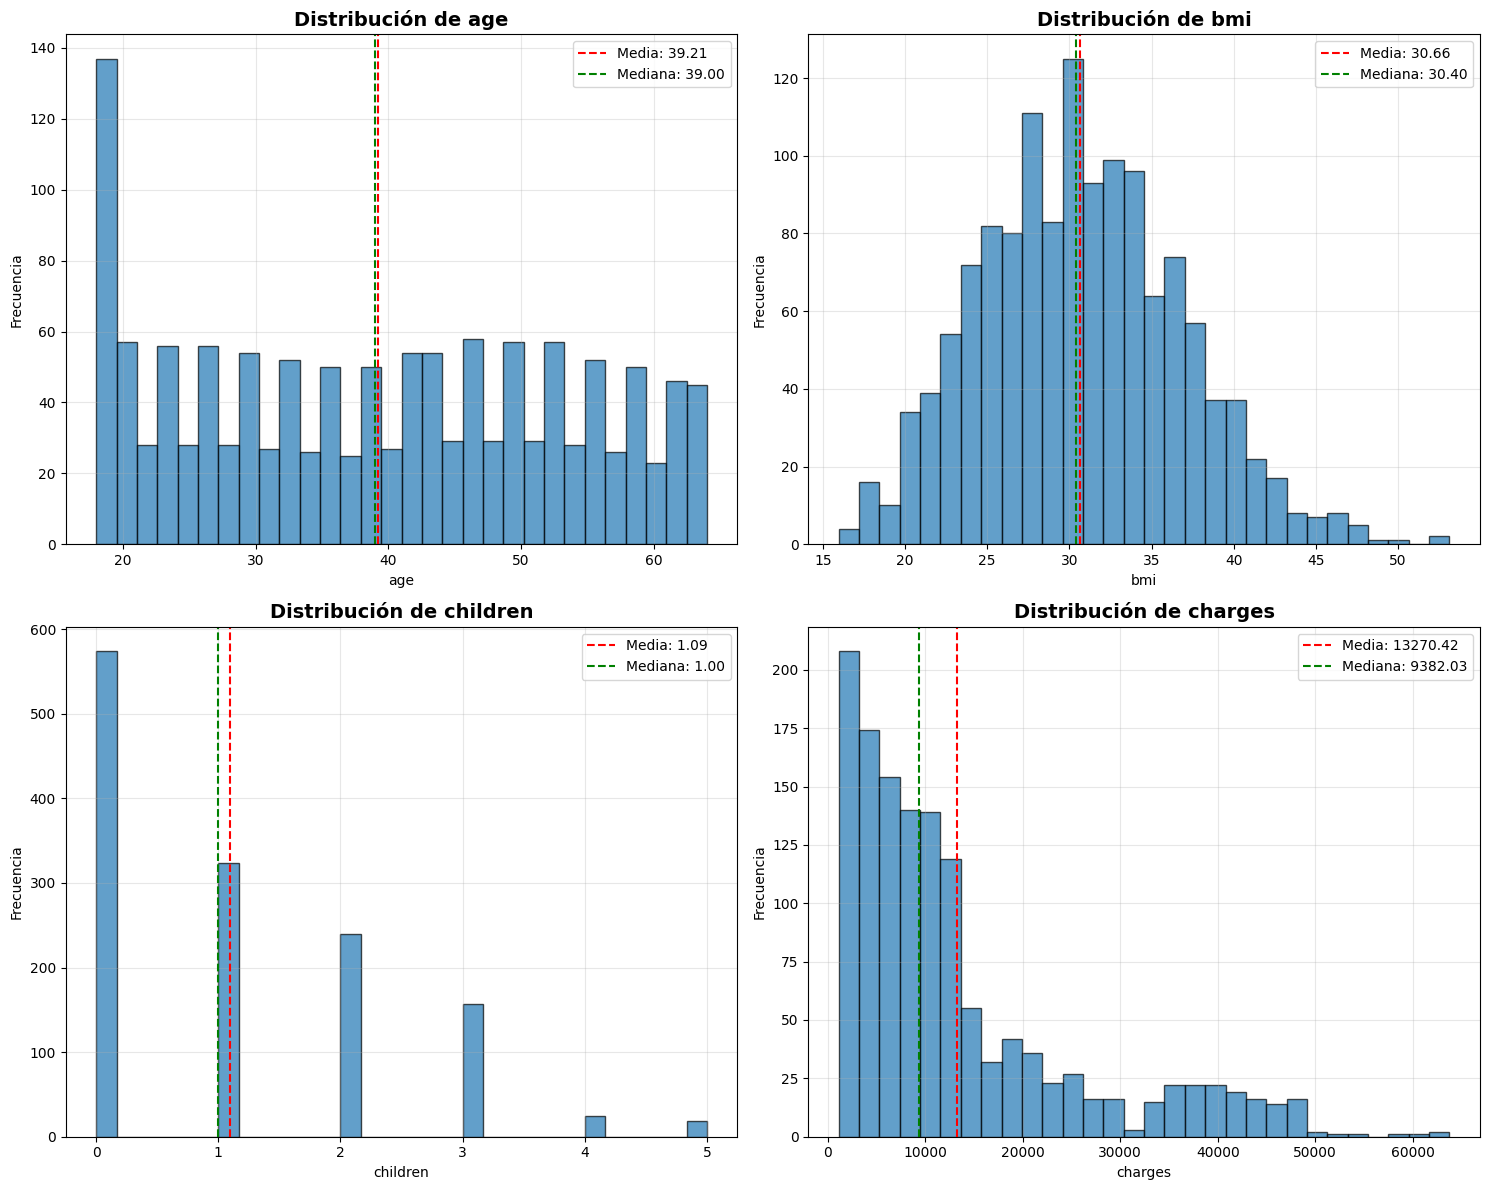

/tmp/ipython-input-557497914.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df[var], patch_artist=True,
/tmp/ipython-input-557497914.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df[var], patch_artist=True,
/tmp/ipython-input-557497914.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df[var], patch_artist=True,
/tmp/ipython-input-557497914.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = 

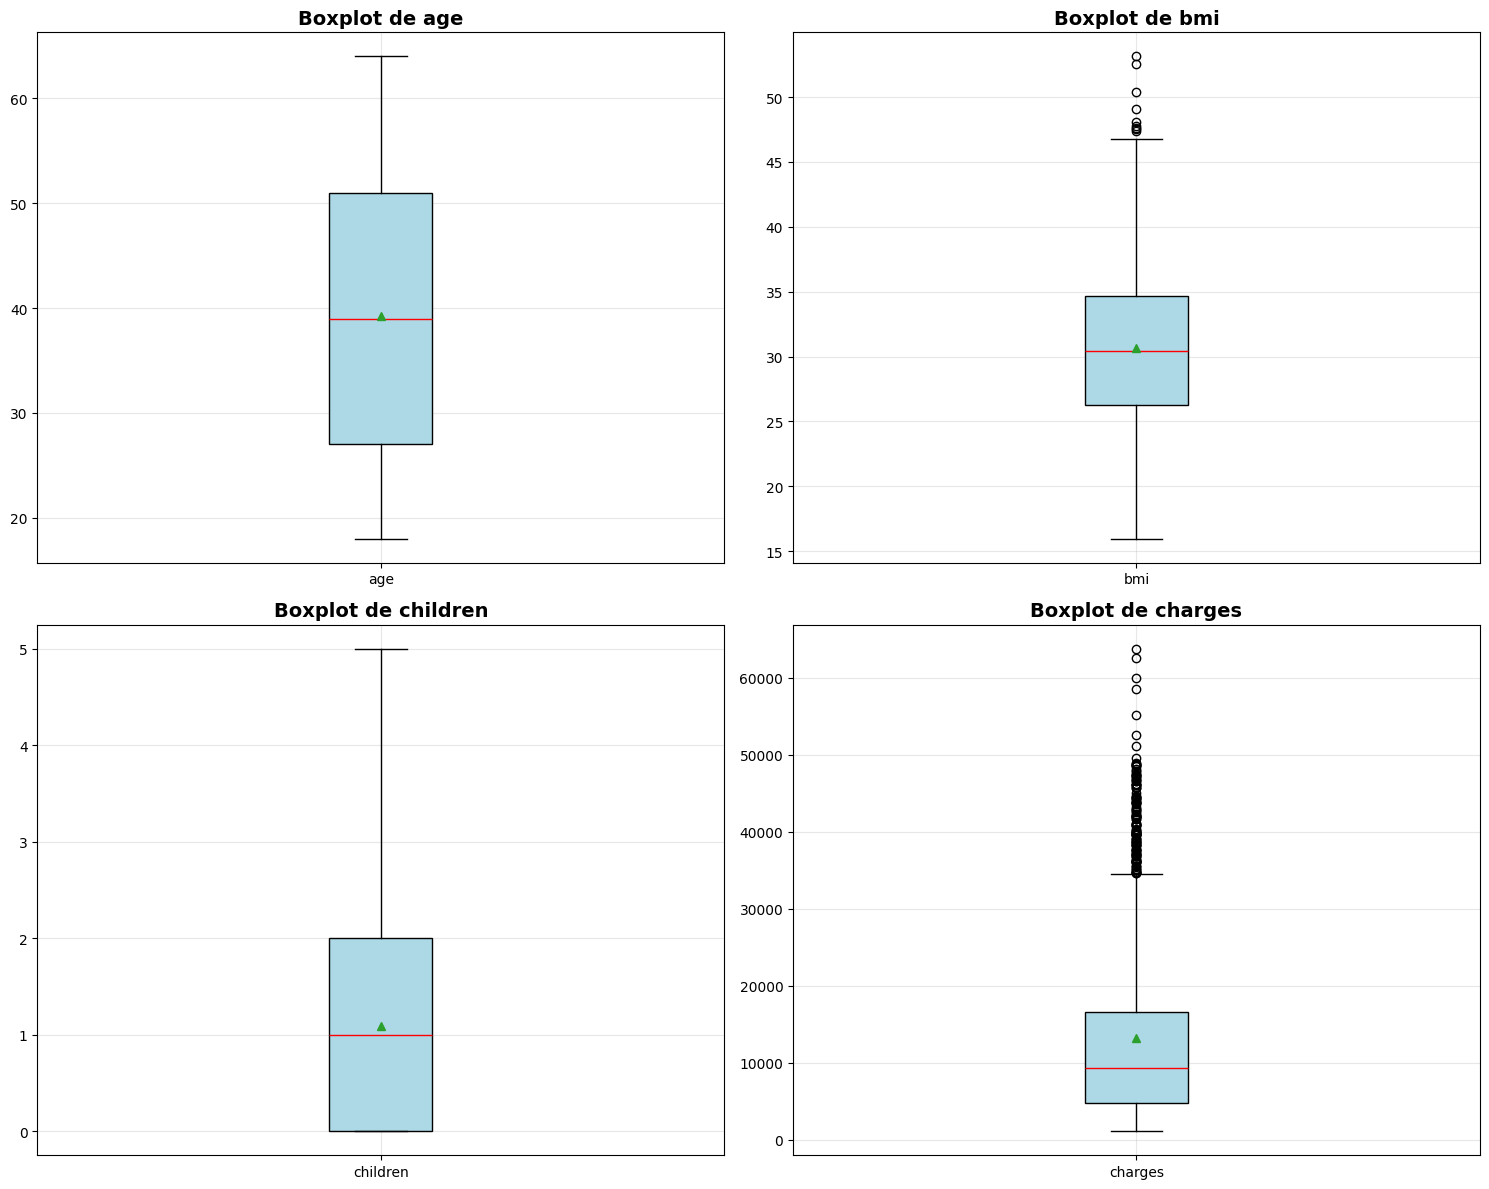

In [5]:
variables_numericas = ['age', 'bmi', 'children', 'charges']

for var in variables_numericas:
    print(f"\n--- Análisis de {var.upper()} ---")
    print(f"Medidas de tendencia central:")
    print(f"  Media: {df[var].mean():.2f}")
    print(f"  Mediana: {df[var].median():.2f}")
    print(f"  Moda: {df[var].mode().values[0]:.2f}")

    print(f"\nMedidas de dispersión:")
    print(f"  Desviación estándar: {df[var].std():.2f}")
    print(f"  Varianza: {df[var].var():.2f}")
    print(f"  Rango: {df[var].max() - df[var].min():.2f}")
    print(f"  IQR: {df[var].quantile(0.75) - df[var].quantile(0.25):.2f}")
    print(f"  Coeficiente de variación: {(df[var].std()/df[var].mean())*100:.2f}%")

    print(f"\nValores extremos (outliers):")
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lim_inf) | (df[var] > lim_sup)]
    print(f"  Número de outliers: {len(outliers)}")
    print(f"  Porcentaje de outliers: {(len(outliers)/len(df))*100:.2f}%")

print("\n" + "="*50)
print("3. GRÁFICOS - VARIABLES NUMÉRICAS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):
    axes[i].hist(df[var], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribución de {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    axes[i].axvline(df[var].median(), color='green', linestyle='--', label=f'Mediana: {df[var].median():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(variables_numericas):

    boxplot = axes[i].boxplot(df[var], patch_artist=True,
                            labels=[var], showmeans=True)

    boxplot['boxes'][0].set_facecolor('lightblue')
    boxplot['whiskers'][0].set_color('black')
    boxplot['whiskers'][1].set_color('black')
    boxplot['caps'][0].set_color('black')
    boxplot['caps'][1].set_color('black')
    boxplot['medians'][0].set_color('red')

    axes[i].set_title(f'Boxplot de {var}', fontsize=14, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--- Análisis de SEX ---
Distribución:
  male: 676 (50.52%)
  female: 662 (49.48%)

--- Análisis de SMOKER ---
Distribución:
  no: 1064 (79.52%)
  yes: 274 (20.48%)

--- Análisis de REGION ---
Distribución:
  southeast: 364 (27.20%)
  southwest: 325 (24.29%)
  northwest: 325 (24.29%)
  northeast: 324 (24.22%)
5. GRÁFICOS - VARIABLES CATEGÓRICAS


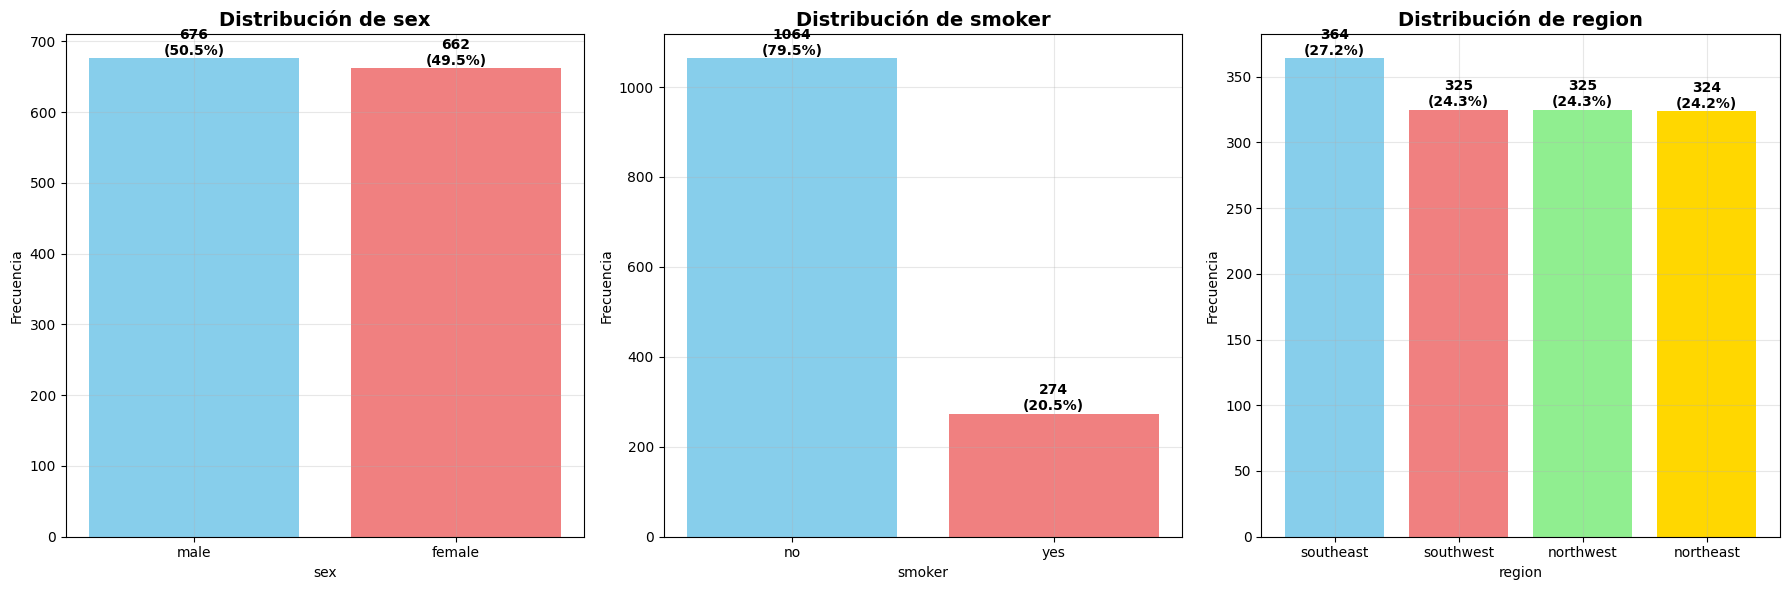

In [6]:
variables_categoricas = ['sex', 'smoker', 'region']

for var in variables_categoricas:
    print(f"\n--- Análisis de {var.upper()} ---")
    conteo = df[var].value_counts()
    porcentaje = df[var].value_counts(normalize=True) * 100

    print("Distribución:")
    for categoria, count, perc in zip(conteo.index, conteo.values, porcentaje.values):
        print(f"  {categoria}: {count} ({perc:.2f}%)")

print("5. GRÁFICOS - VARIABLES CATEGÓRICAS")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(variables_categoricas):
    conteo = df[var].value_counts()
    bars = axes[i].bar(conteo.index, conteo.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

    axes[i].set_title(f'Distribución de {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

    for bar, valor in zip(bars, conteo.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{valor}\n({valor/len(df)*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  



MATRIZ DE CORRELACIÓN:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


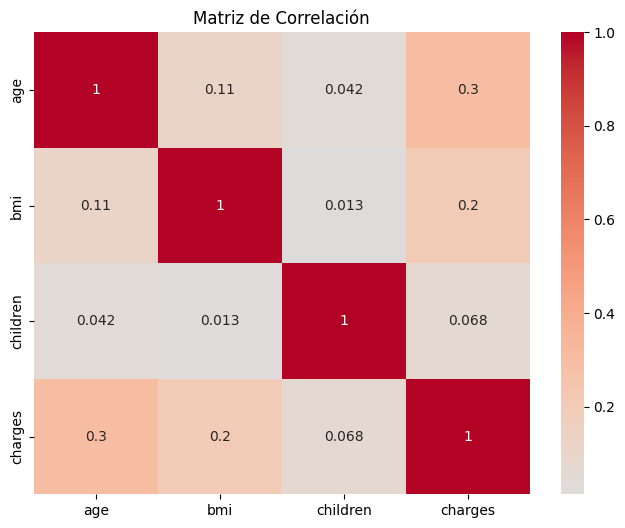


CORRELACIONES CON CHARGES:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variables_numericas = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[variables_numericas].corr()

print("MATRIZ DE CORRELACIÓN:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

print("\nCORRELACIONES CON CHARGES:")
print(correlation_matrix['charges'].sort_values(ascending=False))

No tiene niguna variable como relacion fuerte ni algo util la mas es age con 0.29 lo cuale s una realcion debil tal vez por el lado de las variables categoricas exista uan relacion mas determinante.

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  



1. No tengo valores faltantes


In [8]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['sex', 'smoker', 'region']

encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' evita redundancia
encoded_array = encoder.fit_transform(df[categorical_columns])

feature_names = encoder.get_feature_names_out(categorical_columns)

df_encoded = pd.DataFrame(encoded_array, columns=feature_names)

numerical_columns = ['age', 'bmi', 'children', 'charges']
df_final = pd.concat([df[numerical_columns], df_encoded], axis=1)

print("Dataset transformado:")
print(df_final.head())

Dataset transformado:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0  


In [9]:
from sklearn.preprocessing import StandardScaler

numeric_columns_to_scale = ['age', 'bmi', 'children']

scaler = StandardScaler()
df_final[numeric_columns_to_scale] = scaler.fit_transform(df_final[numeric_columns_to_scale])

print("Dataset completamente preparado:")
print(df_final.head())

Dataset completamente preparado:
        age       bmi  children      charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  16884.92400       0.0         1.0   
1 -1.509965  0.509621 -0.078767   1725.55230       1.0         0.0   
2 -0.797954  0.383307  1.580926   4449.46200       1.0         0.0   
3 -0.441948 -1.305531 -0.908614  21984.47061       1.0         0.0   
4 -0.513149 -0.292556 -0.908614   3866.85520       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_yes        1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(9)
memory usage: 94.2 KB


#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  



In [13]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Preparar datos (X = features, y = target)
X = df_final.drop('charges', axis=1)
y = df_final['charges']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== COMPARACIÓN DE MODELOS ===")
print(f"Tamaño del dataset: {X.shape}")
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros\n")

# 3. Entrenar modelo LASSO (alpha=0.1)
print("MODELO LASSO (L1 Regularization)")
print("   Alpha = 0.1")
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

# Predicciones y métricas Lasso
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"   MSE: {mse_lasso:,.2f}")
print(f"   R²:  {r2_lasso:.4f}")

# 4. Entrenar modelo RIDGE (alpha=1.0)
print("\nMODELO RIDGE (L2 Regularization)")
print("   Alpha = 1.0")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

# Predicciones y métricas Ridge
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"   MSE: {mse_ridge:,.2f}")
print(f"   R²:  {r2_ridge:.4f}")

# 5. ANÁLISIS DE COEFICIENTES (CORREGIDO)
print("\n" + "="*50)
print("ANÁLISIS DE VARIABLES IMPORTANTES")
print("="*50)

coef_comparison = pd.DataFrame({
    'Variable': X.columns,
    'Lasso_Coeff': lasso.coef_,
    'Ridge_Coeff': ridge.coef_
})

# Ordenar por importancia absoluta en Lasso
coef_comparison['Lasso_Abs'] = np.abs(coef_comparison['Lasso_Coeff'])
coef_comparison = coef_comparison.sort_values('Lasso_Abs', ascending=False)

print("Coeficientes ordenados por importancia (Lasso):")
print(coef_comparison.drop('Lasso_Abs', axis=1).to_string(index=False))

# 6. IDENTIFICAR VARIABLES MÁS IMPORTANTES
print("\n VARIABLES MÁS RELEVANTES:")

# Variables con mayor impacto en Lasso
top_variables = coef_comparison.head(5)
for idx, row in top_variables.iterrows():
    variable = row['Variable']
    lasso_coef = row['Lasso_Coeff']
    ridge_coef = row['Ridge_Coeff']

    impacto = "POSITIVO" if lasso_coef > 0 else "NEGATIVO"
    print(f"   • {variable:20} | Lasso: {lasso_coef:8.2f} | Ridge: {ridge_coef:8.2f} | {impacto}")

# 7. RESUMEN EJECUTIVO
print("\n" + "="*50)
print("📈 RESUMEN EJECUTIVO")
print("="*50)

print(f"LASSO (alpha=0.1):")
print(f"   • R²:  {r2_lasso:.4f} → {'BUENO' if r2_lasso > 0.7 else 'REGULAR' if r2_lasso > 0.5 else 'BAJO'}")
print(f"   • MSE: {mse_lasso:,.0f}")

print(f"\nRIDGE (alpha=1.0):")
print(f"   • R²:  {r2_ridge:.4f} → {'BUENO' if r2_ridge > 0.7 else 'REGULAR' if r2_ridge > 0.5 else 'BAJO'}")
print(f"   • MSE: {mse_ridge:,.0f}")

# Comparación de modelos
if r2_lasso > r2_ridge:
    mejor_modelo = "LASSO"
elif r2_ridge > r2_lasso:
    mejor_modelo = "RIDGE"
else:
    mejor_modelo = "EMPATE"

print(f"\n MEJOR MODELO: {mejor_modelo}")


=== COMPARACIÓN DE MODELOS ===
Tamaño del dataset: (1338, 8)
Entrenamiento: 1070 registros
Prueba: 268 registros

MODELO LASSO (L1 Regularization)
   Alpha = 0.1
   MSE: 33,597,788.88
   R²:  0.7836

MODELO RIDGE (L2 Regularization)
   Alpha = 1.0
   MSE: 33,645,391.30
   R²:  0.7833

ANÁLISIS DE VARIABLES IMPORTANTES
Coeficientes ordenados por importancia (Lasso):
        Variable  Lasso_Coeff  Ridge_Coeff
      smoker_yes 23650.480453 23514.634824
             age  3609.055670  3603.270803
             bmi  2054.667314  2051.938363
region_southwest  -808.129182  -802.913351
region_southeast  -656.108046  -643.009456
        children   512.382874   513.153656
region_northwest  -369.042679  -366.152625
        sex_male   -18.137005   -10.635579

🎯 VARIABLES MÁS RELEVANTES:
   • smoker_yes           | Lasso: 23650.48 | Ridge: 23514.63 | POSITIVO
   • age                  | Lasso:  3609.06 | Ridge:  3603.27 | POSITIVO
   • bmi                  | Lasso:  2054.67 | Ridge:  2051.94 | POSITI

**¿Qué modelo tiene un mejor R²?**

seria MODELO RIDGE el que tienen un mejor R² pero es muy poca la diferencia ridge con  0.7833 y LASSO con 0.7836

**¿Por qué crees que ocurre esto?**
  
  Debido a que fumar ya es un gran costo por si solo nos ayuda para predecirlo mejor es como una gran pieza que nos dan del rompecabezas

**¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?**

No hay variables cercanas a cero el mas cercano es el de -18... posiblemente con un alpha mayor si seria 0% y es porque no es relevante para la variable de salida.

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  



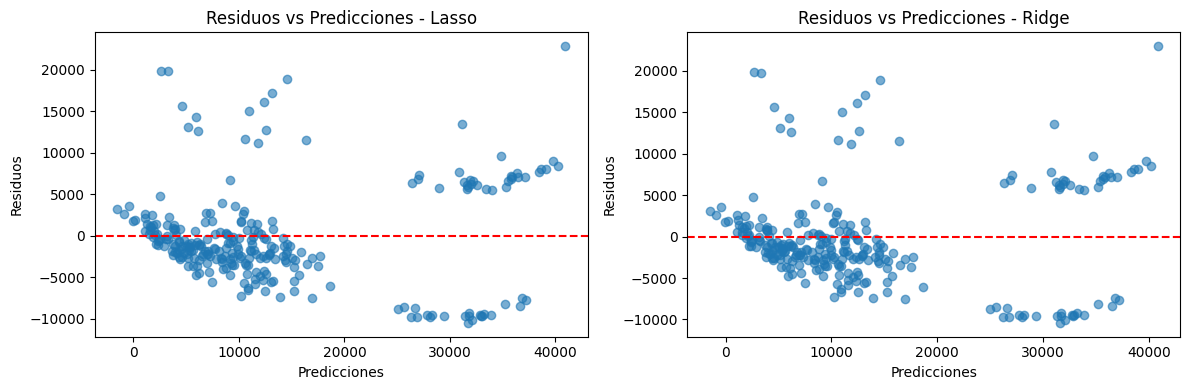

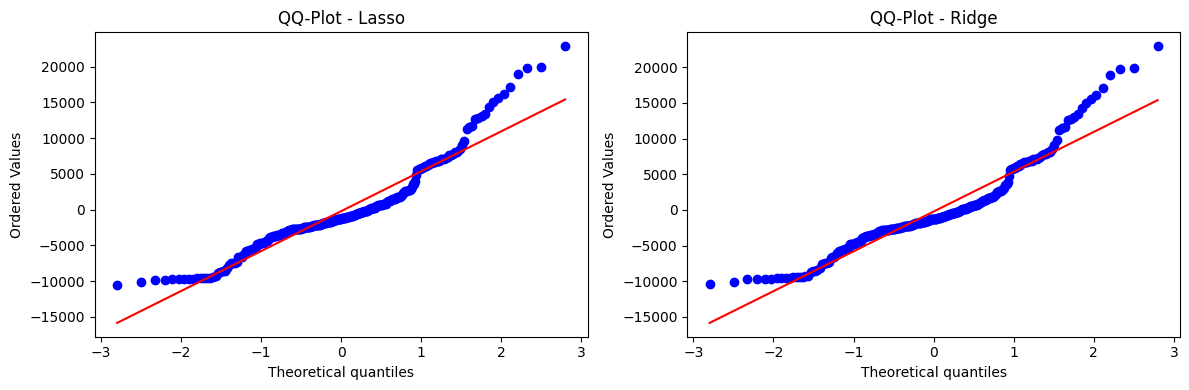

TEST DE NORMALIDAD (Shapiro-Wilk):
Lasso: p-value = 0.0000
Ridge: p-value = 0.0000
p-value > 0.05 = residuos normales

MULTICOLINEALIDAD (VIF):
           Variable       VIF
0               age  1.015843
1               bmi  1.088673
2          children  1.003348
3          sex_male  1.674830
4        smoker_yes  1.228075
5  region_northwest  1.223453
6  region_southeast  1.357419
7  region_southwest  1.215686
VIF > 10 = problema de multicolinealidad


In [14]:
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Residuos vs Predicciones (Linealidad)
plt.figure(figsize=(12, 4))

# Lasso
plt.subplot(1, 2, 1)
plt.scatter(lasso.predict(X_test), y_test - lasso.predict(X_test), alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones - Lasso')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

# Ridge
plt.subplot(1, 2, 2)
plt.scatter(ridge.predict(X_test), y_test - ridge.predict(X_test), alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones - Ridge')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

# 2. Normalidad (QQ-Plots)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
stats.probplot(y_test - lasso.predict(X_test), dist="norm", plot=plt)
plt.title('QQ-Plot - Lasso')

plt.subplot(1, 2, 2)
stats.probplot(y_test - ridge.predict(X_test), dist="norm", plot=plt)
plt.title('QQ-Plot - Ridge')

plt.tight_layout()
plt.show()

# 3. Test de Normalidad
shapiro_lasso = stats.shapiro(y_test - lasso.predict(X_test))
shapiro_ridge = stats.shapiro(y_test - ridge.predict(X_test))

print("TEST DE NORMALIDAD (Shapiro-Wilk):")
print(f"Lasso: p-value = {shapiro_lasso.pvalue:.4f}")
print(f"Ridge: p-value = {shapiro_ridge.pvalue:.4f}")
print("p-value > 0.05 = residuos normales")

# 4. Multicolinealidad (VIF)
print("\nMULTICOLINEALIDAD (VIF):")
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
print("VIF > 10 = problema de multicolinealidad")

📌 **Pregunta:**  
- **¿Se cumplen los supuestos en ambos modelos?**  
No, no se cumplen todos los supuestos. Hay problemas de normalidad en los residuos y probablemente heterocedasticidad.



- **Si hay heterocedasticidad, ¿cómo podría solucionarse?**
Viendo que los errores estan en las cantidades grandes le aplicaria un Logaritmo para de esta forma contraer los datos.

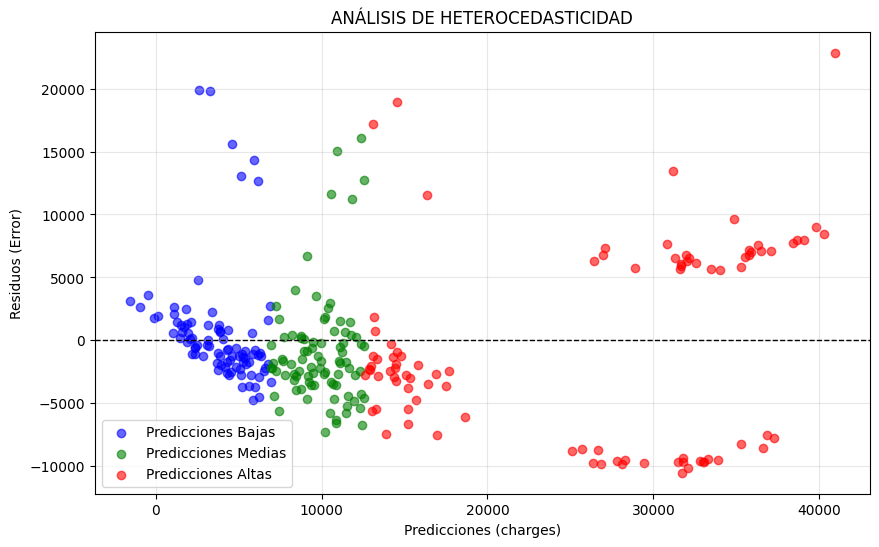

VARIANZA DE RESIDUOS POR GRUPOS:
Predicciones Bajas: Varianza = 20,949,179
Predicciones Medias: Varianza = 19,038,031
Predicciones Altas: Varianza = 58,776,836

RELACIÓN ENTRE PREDICCIÓN Y ERROR:
Correlación entre predicción y magnitud del error: 0.542


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener predicciones y residuos
y_pred = lasso.predict(X_test)
residuos = y_test - y_pred

# 2. Gráfico de análisis de heterocedasticidad
plt.figure(figsize=(10, 6))

# Dividir las predicciones en 3 grupos: bajas, medias, altas
bins = np.percentile(y_pred, [33, 66])
grupos = np.digitize(y_pred, bins)

colores = ['blue', 'green', 'red']
etiquetas = ['Predicciones Bajas', 'Predicciones Medias', 'Predicciones Altas']

for i in range(3):
    mask = (grupos == i)
    plt.scatter(y_pred[mask], residuos[mask],
                alpha=0.6, color=colores[i], label=etiquetas[i])

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicciones (charges)')
plt.ylabel('Residuos (Error)')
plt.title('ANÁLISIS DE HETEROCEDASTICIDAD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Calcular varianza por grupos
print("VARIANZA DE RESIDUOS POR GRUPOS:")
for i in range(3):
    mask = (grupos == i)
    varianza = np.var(residuos[mask])
    print(f"{etiquetas[i]}: Varianza = {varianza:,.0f}")

# 4. Ver patrón de crecimiento
print(f"\nRELACIÓN ENTRE PREDICCIÓN Y ERROR:")
correlacion = np.corrcoef(y_pred, np.abs(residuos))[0,1]
print(f"Correlación entre predicción y magnitud del error: {correlacion:.3f}")

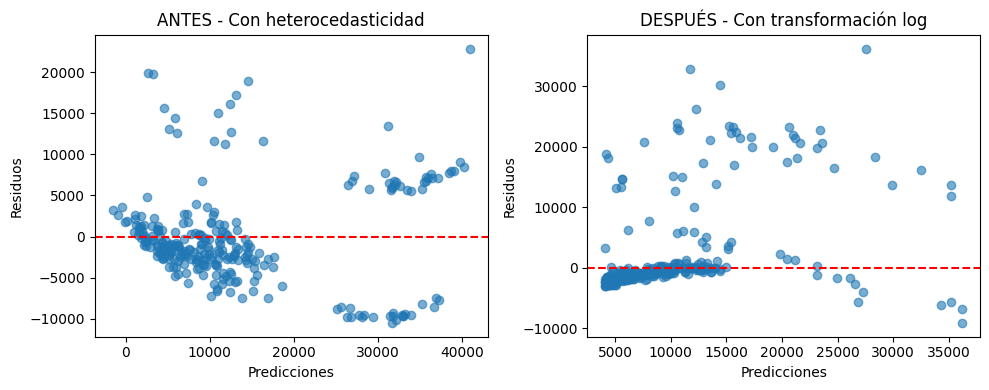

In [19]:
# 1. Hacer predicciones con el nuevo modelo transformado
y_pred_nuevo = np.exp(lasso_log.predict(X_test))

# 2. Calcular residuos nuevos
residuos_nuevos = np.exp(y_test_log) - y_pred_nuevo

# 3. Gráfico simple para comparar
plt.figure(figsize=(10, 4))

# ANTES
plt.subplot(1, 2, 1)
plt.scatter(y_pred_lasso, y_test - y_pred_lasso, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('ANTES - Con heterocedasticidad')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

# DESPUÉS
plt.subplot(1, 2, 2)
plt.scatter(y_pred_nuevo, residuos_nuevos, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('DESPUÉS - Con transformación log')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()


Pero veo que esto genero otro problema la precision aumento pero los casos con mayor de 2000 de residuo aumentaron creciendo hasta un rango de 35000, cuando antes lo maximo de error 20000

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- **¿Qué modelo es más interpretable?**
- **¿Cuál reduce mejor el sobreajuste?**  
- **¿Qué variables son más importantes en cada caso?**  

Ambos las diferencias son insignificantes, en cada uno de los casos.
 En los graficos se puede apreciar.
---



### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.